# Setup

In [1]:
# importing
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# loading the data
df = pd.read_csv('churn_bank.csv')

NRows, NColumns = df.shape

columnNames = list(df.columns)

In [3]:
# Creating two additional datasets for comparison
dfStayed = df.loc[df['Exited']==1]
dfExited = df.loc[df['Exited']==0]

# General Analysis

### Calculating the differences in summary statistics

In [4]:
#pip install tabulate
from tabulate import tabulate

In [7]:
## calculating the differences in summary statistics
columnNamesDescribe = list(df.columns.drop(['Surname', 'Geography', 'Gender']))
columns2keep = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
columns2Drop = [val for val in columnNamesDescribe if val not in columns2keep]

differences_in_trends = np.array(dfExited.describe().T.drop(columns2Drop)) - np.array(dfStayed.describe().T.drop(columns2Drop))
#differences_in_trends = (np.array(dfExited.describe().T.drop(columns2Drop)) - np.array(dfStayed.describe().T.drop(columns2Drop)))/np.array(dfStayed.describe().T.drop(columns2Drop))
#len(columnNames)-len(differences_in_trends)
differences_in_trends = pd.DataFrame(differences_in_trends).set_index(pd.Index(columns2keep))

headers=['variable', 'count','mean', 'std', 'min', '25%', '50%', '75%', 'max']
table = [pd.DataFrame(columns2keep), pd.DataFrame(differences_in_trends)]
print(tabulate(differences_in_trends, headers))

variable           count           mean           std    min        25%       50%       75%        max
---------------  -------  -------------  ------------  -----  ---------  --------  --------  ---------
CreditScore         5926       6.5017      -4.66767    55          7          7        2          0
Age                 5926      -7.42961      0.363801    0         -7         -9      -10          8
Tenure              5926       0.100535    -0.0554485   0          1          0       -1          0
Balance             5926  -18363.2       4487.25        0     -38340     -17276.6  -5023.05  -29365.3
EstimatedSalary     5926   -1727.29      -506.831      78.49   -1124.23   -2815.8  -3812.95     184.38


* Credit Score: no big difference between exited and stayed, except that it seems the min value of those who exited is higher.
* Age: those who exit are on average 7 years younger.
* tenure: Those who exit seem to have been clients of the bank for a bit longer, but not a significative amount of time in average.
* Balance: Those who exit seem to have a smaller average balance (of almost 19000).
* EstmatedSalary: those who exit have a slightly smaller salary but nothing huge/significative.

### Making dictionaries for the general descriptions

In [8]:
# creating a dictionary for all types
types_df = df.dtypes.to_frame(name="type")

types = {}
for i in range(0, 13):
    types[columnNames[i]] = types_df.iloc[i, 0].type

In [366]:
# creating a dictionary for all mins, means, maxs, ...
df_describe = df.describe().T

mins_df = df_describe.loc[:,"min"]
maxs_df = df_describe.loc[:,"max"]
means_df = df_describe.loc[:,"mean"]
median_df = df_describe.loc[:,"50%"]
std_df = df_describe.loc[:,"std"]

mins = {}
means = {}
maxs = {}
medians = {}
stds = {}

for i in range(len(df_describe)):
    key = columnNamesDescribe[i]
    mins[key] = mins_df.iloc[i]
    maxs[key] = maxs_df.iloc[i]
    means[key] = means_df.iloc[i]
    medians[key] = median_df.iloc[i]
    stds[key] = std_df.iloc[i]
    

# Individual distribution of variables

The categorical variables are be Geography, Gender, HasCrCard, IsActiveMember, Exited.

The quantitative variables are CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary. 

We will not be focusing on CustomerId or Surname. 

### Customer Profile: Gender, Age and Geography

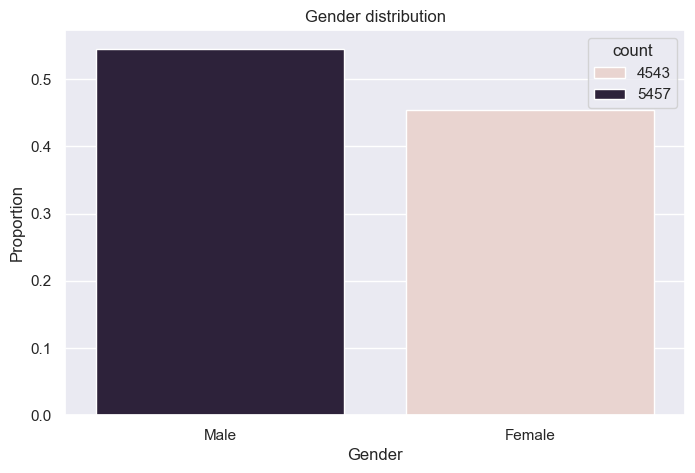

The bank has 4543 female clients (45.43 percent of the total) and 5457 male clients (54.57 percent of the total).


In [368]:
# gender
fig, ax = plt.subplots(figsize = (8,5))

sns.barplot(x = df["Gender"].value_counts().index,
            y = df["Gender"].value_counts(normalize=True), 
            hue=df["Gender"].value_counts()#,
            #palette=sns.color_palette("colorblind")
)
sns.set_theme(style="darkgrid")
ax.set(
    title = "Gender distribution",
    xlabel = "Gender",
    ylabel = "Proportion"
)
plt.show()

message = "The bank has {} female clients ({} percent of the total) and {} male clients ({} percent of the total).".format(
    df["Gender"].value_counts().iloc[1],
    df["Gender"].value_counts(normalize=True).mul(100).round(2).iloc[1],
    df["Gender"].value_counts().iloc[0],
    df["Gender"].value_counts(normalize=True).mul(100).round(2).iloc[0]
)
print(message)

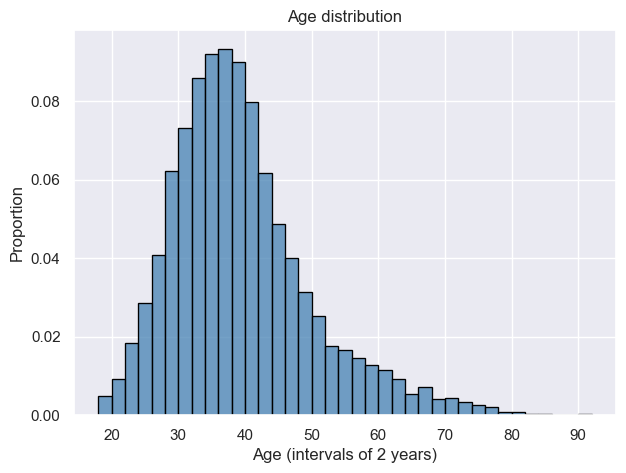

The bank's clients are between 18 and 92 years old, with the median age being 37.0 and a standard deviation of 10.49 years.


In [371]:
# Age
fig, ax = plt.subplots(figsize=[7, 5])

sns.histplot(
    x = df["Age"],
    stat='probability',
    binwidth = 2,
    color="steelblue",
    edgecolor = "black",
)

ax.set(
    title = "Age distribution",
    xlabel = "Age (intervals of 2 years)",
    ylabel = "Proportion"
)
sns.set_theme(style="darkgrid")
plt.show()

message = "The bank's clients are between {} and {} years old, with the median age being {} and a standard deviation of {} years.".format(
    int(mins["Age"]), int(maxs["Age"]),
    round(medians["Age"], 2), round(stds["Age"], 2)
)
print(message)

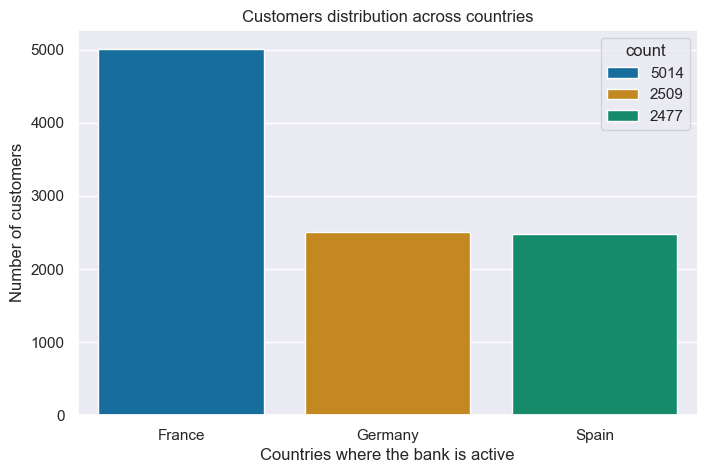

The bank's clients are majoritarily from France (50.14 percent),
followed closely by Germany and Spain (25.09 and 24.77 percent of the total respectively).


In [372]:
# Geography
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["Geography"].value_counts().index,
            y = df["Geography"].value_counts(),
            hue=df["Geography"].value_counts(),
            hue_order = df["Geography"].value_counts(),
            palette=sns.color_palette("colorblind", 3)
            )

sns.set_theme(style="darkgrid")

ax.set(
    title = "Customers distribution across countries",
    xlabel = "Countries where the bank is active",
    ylabel = "Number of customers"
)
plt.show()

message = "The bank's clients are majoritarily from France ({} percent),\nfollowed closely by Germany and Spain ({} and {} percent of the total respectively).".format(
    df["Geography"].value_counts(normalize=True).mul(100).round(2).iloc[0],
    df["Geography"].value_counts(normalize=True).mul(100).round(2).iloc[1],
    df["Geography"].value_counts(normalize=True).mul(100).round(2).iloc[2]
)
print(message)

France
Germany
Spain


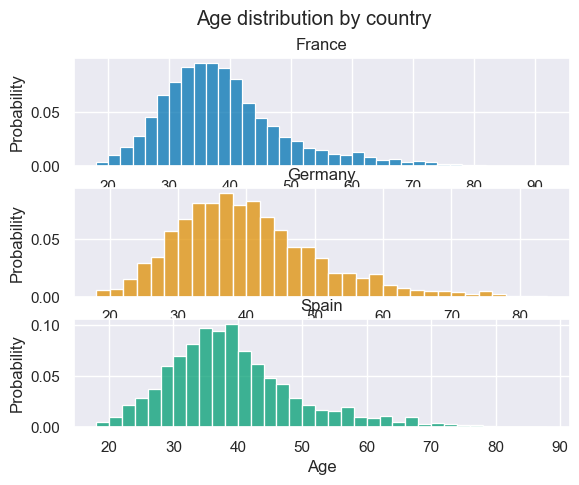

In [378]:
# Age and geography
# NOT SURE ABOUT THIS ONE
fig, ax = plt.subplots(3, 1)

for i in range (0,3):
    country = df["Geography"].value_counts().index[i]
    print(country)
    ax[i].set_title(country)

    this_df = df[df["Geography"] == country]

    sns.histplot(
        x = this_df["Age"],
        stat='probability',
        color=sns.color_palette("colorblind")[i],
        binwidth = 2,
        ax=ax[i]
    )
sns.set_theme(style="darkgrid")
fig.suptitle('Age distribution by country')
plt.show()

There doesnt seem to be any major differences in age distribution for the three countries. 

### Customer Description: Financial Analysis

The average credit score is around 650.5288, with a standard deviation of 96.65 points.
However, this doesn't let us see in detail what the credit score means.


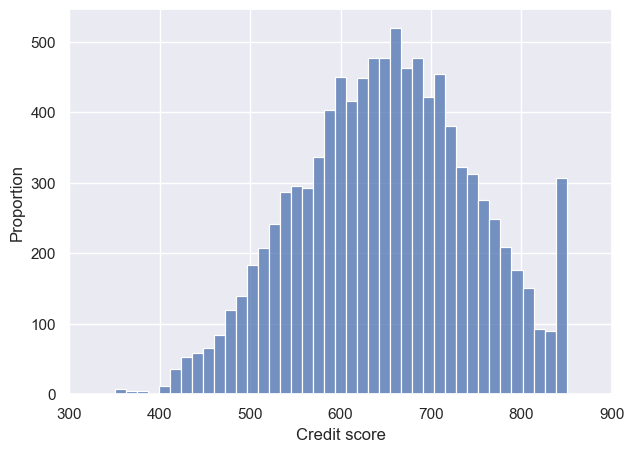

In [383]:
# Credit Score
fig, ax = plt.subplots(figsize=[7, 5])

sns.histplot(
    x = df["CreditScore"]
)
plt.xlim([300, 900]) 

ax.set(
    xlabel = "Credit score",
    ylabel = "Proportion"
)
plt.show()

message = "The average credit score is around {}, with a standard deviation of {} points.\nHowever, this doesn't let us see in detail what the credit score means.".format(
    means["CreditScore"],
    round(stds["CreditScore"], 2)
)
print(message)

Credit scores have categories to simplify the condition of the client:

![image.png](https://www.simmonsbank.com/siteassets/content-hub/learning-center/credit-score-image.jpg)

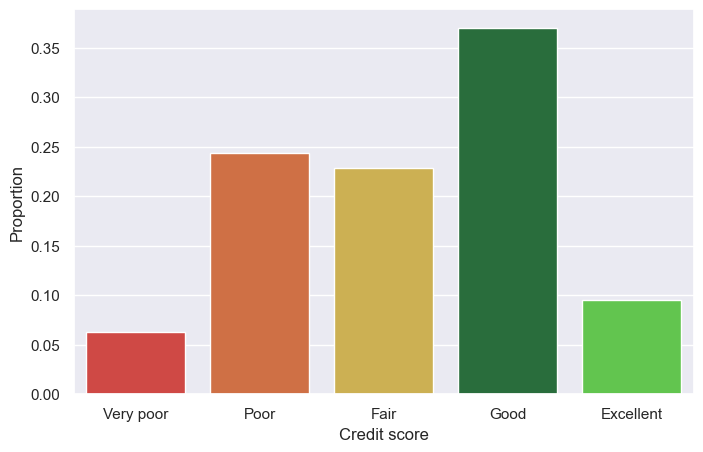

Most clients' credit scores between 'poor' and 'fair',
with 'good' being the most common and very few scoring 'excellent' or 'very poor' credit.


In [384]:
# Categorical Credit Score
conditions = [
    (df['CreditScore'] <= 499),
    ((df['CreditScore'] > 499) & (df['CreditScore'] <= 600)),
    ((df['CreditScore'] > 600) & (df['CreditScore'] <= 660)),
    ((df['CreditScore'] > 660) & (df['CreditScore'] <= 780)),
    (df['CreditScore'] > 780)
    ]
values = ['Very poor', 'Poor', 'Fair', 'Good', 'Excellent']

colors_CreditScore = ["#e6332e", "#e6682e", "#e0bb3f", "#1e7837", "#55d93b"]

df["CreditScoreCategory"] = np.select(conditions, values, default=df["CreditScore"])
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["CreditScoreCategory"].value_counts().index,
            y = df["CreditScoreCategory"].value_counts(normalize=True),
            order=values,
            hue = df["CreditScoreCategory"].value_counts().index,
            hue_order = values,
            palette=sns.color_palette(colors_CreditScore)
            )

ax.set(
    xlabel = "Credit score",
    ylabel = "Proportion"
)
plt.show()

message = "Most clients' credit scores between 'poor' and 'fair',\nwith 'good' being the most common and very few scoring 'excellent' or 'very poor' credit."
print(message)

The average balance is of 76485.89€ and the median is of 97198.54€.
This is because the proportion of people whose balance is at 0 is considerable: 36.17 percent.


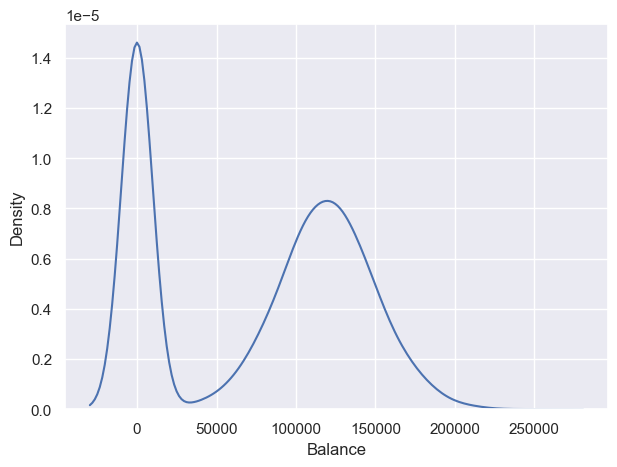

In [382]:
# Balance
fig, ax = plt.subplots(figsize=[7, 5])

sns.kdeplot(
    x = df["Balance"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True),
)
plt.show()

message = "The average balance is of {}€ and the median is of {}€.\nThis is because the proportion of people whose balance is at 0 is considerable: {} percent.".format(
    round(means["Balance"],2),
    round(medians["Balance"],2),
    round((len(df.query("Balance == 0"))/NRows)*100,2)
)
print(message)

The average estimated salary is of 100090.24€ and the median is of 100193.92€.
Indeed, we observe a very uniform distribution across all values, with a slight peak at the end od the distribution.


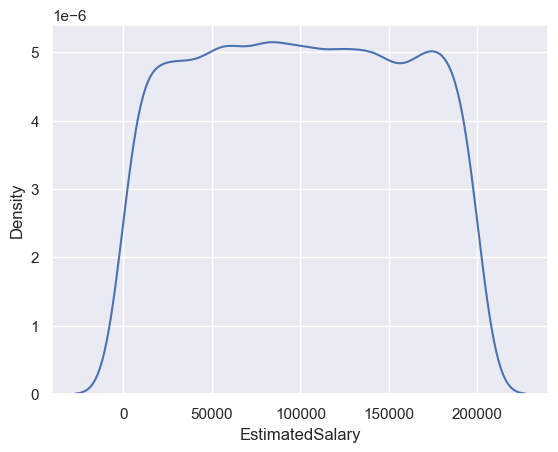

In [291]:
# Estimated Salary

sns.kdeplot(
    x = df["EstimatedSalary"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True)
)
message = "The average estimated salary is of {}€ and the median is of {}€.\nIndeed, we observe a very uniform distribution across all values, with a slight peak at the end of the distribution.".format(
    round(means["EstimatedSalary"],2),
    round(medians["EstimatedSalary"],2)
)
print(message)

### Customer Analysis: Activity

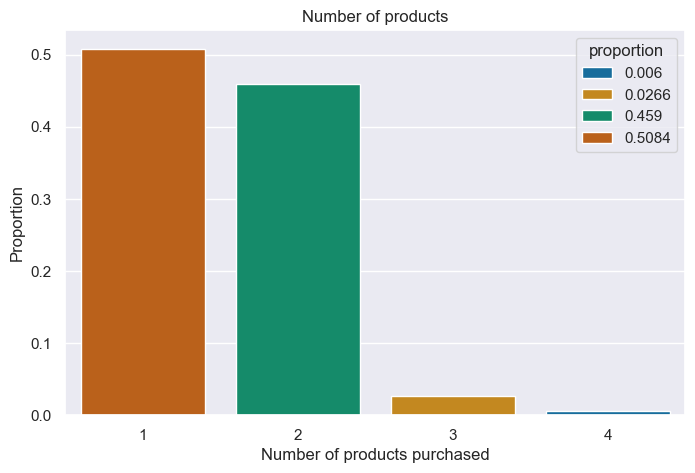

All customers have bought at least 1 product.  
Almost half have bought 2, and under 5 percent have bought more.


In [385]:
#Number of Products
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["NumOfProducts"].value_counts().index,
            y = df["NumOfProducts"].value_counts(normalize=True),
            hue = df["NumOfProducts"].value_counts(normalize=True),
            palette = sns.color_palette("colorblind", 4)
            )

ax.set(
    title = "Number of products purchased",
    xlabel = "Number of products",
    ylabel = "Proportion"
)

plt.show()
message = "All customers have bought at least 1 product.  \nAlmost half have bought 2, and under 5 percent have bought more."
print(message)

/var/folders/cr/71dt26rx1ljbqzzzxpwv5g6r0000gn/T/ipykernel_81169/1091867372.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(("No", "Yes"))


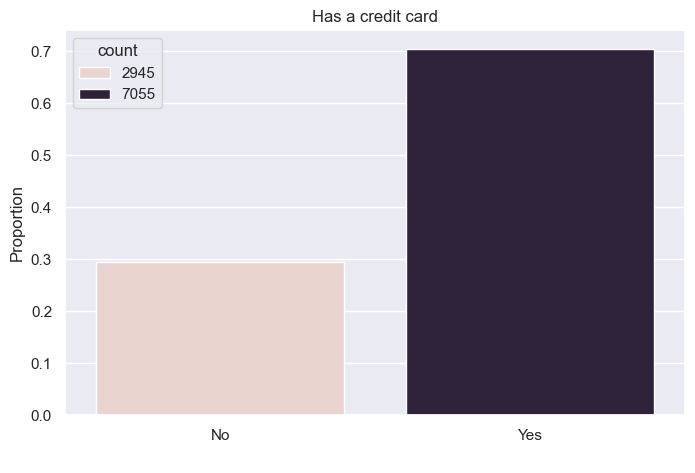

A big majority of bank clients do have a credit card.


In [388]:
# Has credit card
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(
            x = df["HasCrCard"].value_counts().index,
            y = df["HasCrCard"].value_counts(normalize=True),
            hue=df["HasCrCard"].value_counts(),
            )
ax.set_xticklabels(("No", "Yes"))
ax.set(
    title = "Has a credit card",
    xlabel = " ",
    ylabel = "Proportion"
)
plt.show()

message = "A big majority of bank clients do have a credit card."
print(message)

The proportions of active and non active members are almost (worriyngly?) equal.


/var/folders/cr/71dt26rx1ljbqzzzxpwv5g6r0000gn/T/ipykernel_81169/4087161215.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Not recently active", "Recently active"]);


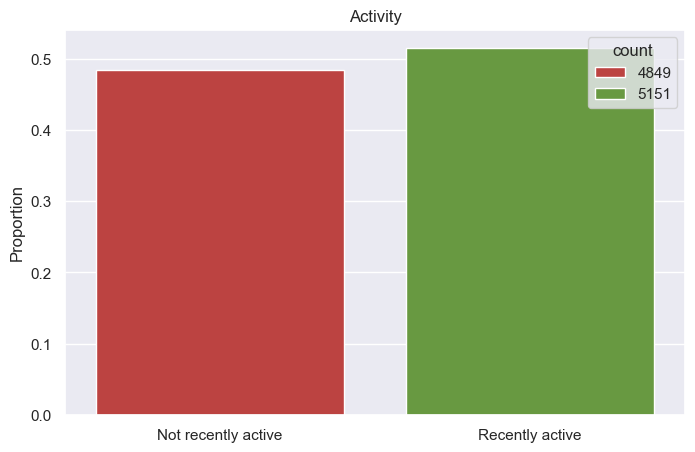

In [389]:
# Is an active member
fig, ax = plt.subplots(figsize = (8,5))
colors = ["#d12f2c","#66a832"]
sns.barplot(
            x = df["IsActiveMember"].value_counts().index,
            y = df["IsActiveMember"].value_counts(normalize=True),
            hue=df["IsActiveMember"].value_counts(), 
            palette = sns.color_palette(colors)
            )
ax.set_xticklabels(["Not recently active", "Recently active"])

sns.set_theme(style="darkgrid")
ax.set(
    title = "Activity",
    xlabel = "",
    ylabel = "Proportion"
)
plt.show()

message = "The proportions of active and non active members are almost (worriyngly?) equal."
print(message)

/var/folders/cr/71dt26rx1ljbqzzzxpwv5g6r0000gn/T/ipykernel_81169/966228377.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Stayed", "Exited"])


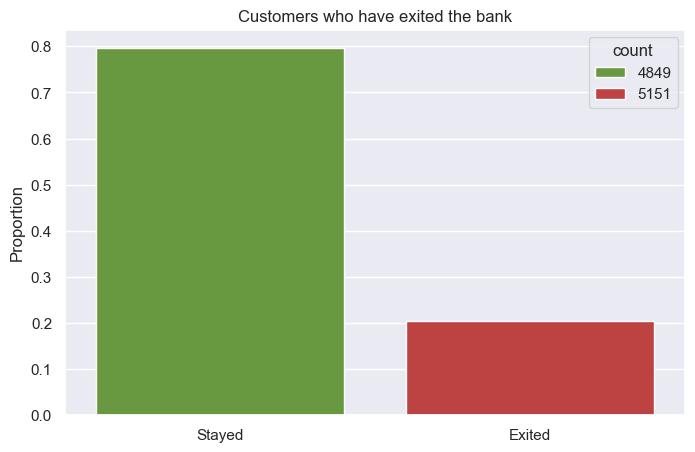

Around 20 percent of customers have exited the bank. The bank wishes to reduce this number.


In [320]:
# Exited
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(
            x = df["Exited"].value_counts().index,
            y = df["Exited"].value_counts(normalize=True),
            hue=df["IsActiveMember"].value_counts(), 
            palette = sns.color_palette(list(reversed(colors)))
            )

ax.set(
    title = "Customers who have exited the bank",
    xlabel = "",
    ylabel = "Proportion"
)
ax.set_xticklabels(["Stayed", "Exited"])

plt.show()
message="Around 20 percent of customers have exited the bank. The bank wishes to reduce this number."
print(message)

There is a uniform repartition of the amount of years the customers have been with this bank,
expect for those that have been with it for 10 years or are newcomers.
The bank is possibly 10 years old?


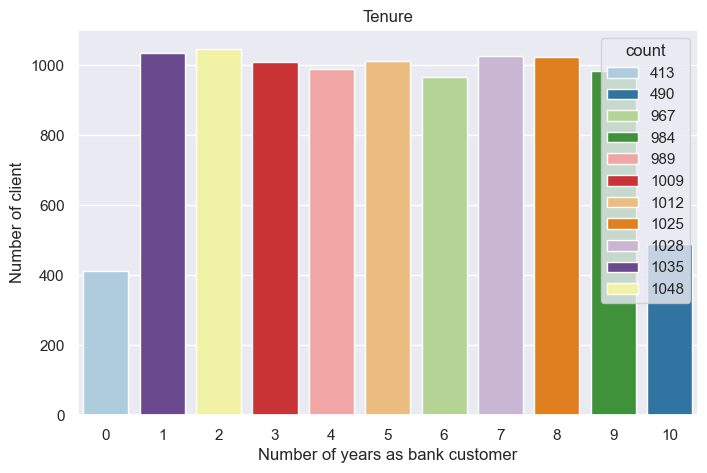

In [361]:
# Tenure
fig, ax = plt.subplots(figsize=[8, 5])

sns.barplot(
    x = df["Tenure"].value_counts().index, 
    y = df["Tenure"].value_counts(),
    hue = df["Tenure"].value_counts(),
    #hue_order = df["Tenure"].index,
    palette = sns.color_palette("Paired",11)
)
ax.set(
    title = "Tenure",
    xlabel = "Number of years as bank customer",
    ylabel = "Number of clients"
)

plt.show()

message = "There is a uniform repartition of the amount of years the customers have been with this bank,\nexpect for those that have been with it for 10 years or are newcomers.\nThe bank is possibly 10 years old?"
print(message)


# How do the different variables interact with each other? 
Can we observe any trends in the variable's structures?

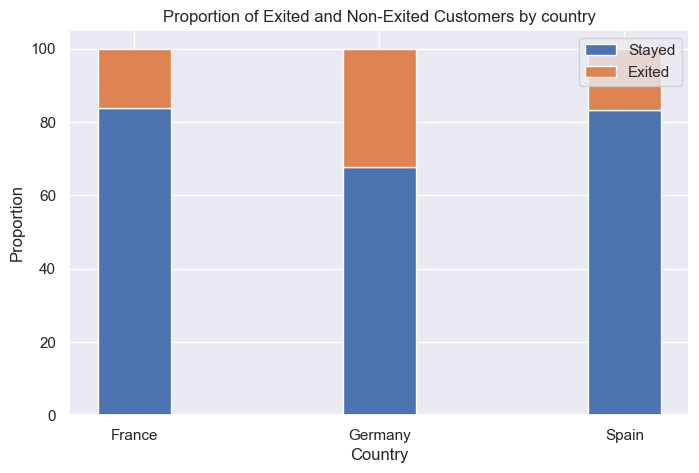

We can see that a higher proportion of people who leave are from Germany.


In [418]:
# Geography, Exited
df_geo_exit = (df
      .groupby("Geography")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_geo_exit.index, df_geo_exit[0], label = 'Stayed', width = 0.3) 
ax.bar(df_geo_exit.index, df_geo_exit[1], bottom = df_geo_exit[0], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers by country",
    xlabel = "Country",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "We can see that a higher proportion of people who leave are from Germany."
print(message)

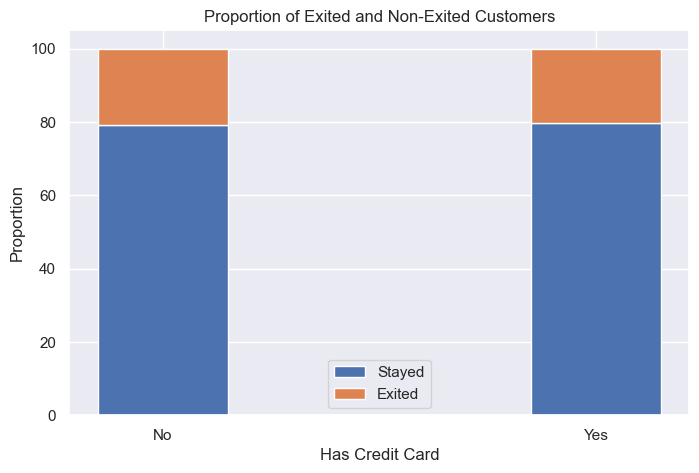

We can see that there is no sognificant difference in leave between people who have and who don't have credit cards.


In [437]:
# HasCreditCard, Exited
df_card_exit = (df
      .groupby("HasCrCard")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())
#df_card_exit.index = ["False", "True"]


fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_card_exit.index, df_card_exit[0], label = 'Stayed', tick_label = ["No", "Yes"],  width = 0.3) 
ax.bar(df_card_exit.index, df_card_exit[1], bottom = df_card_exit[0], tick_label = ["No", "Yes"], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers",
    xlabel = "Has Credit Card",
    ylabel = "Proportion",
)
ax.legend()
plt.show()

message = "We can see that there is no sognificant difference in leave between people who have and who don't have credit cards."
print(message)


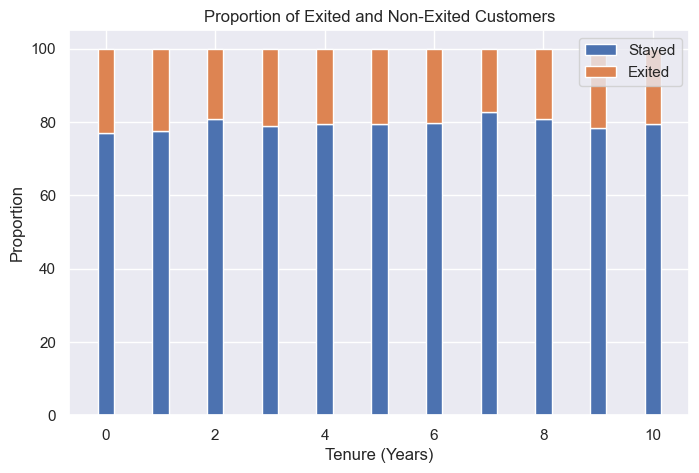

There doesn't seem to be any significant predictor in leaving or staying by the number of years a client has been with the bank.


In [421]:
# Tenure, Exited
df_tenure_exit = (df
      .groupby("Tenure")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_tenure_exit.index, df_tenure_exit[0], label = 'Stayed', width = 0.3) 
ax.bar(df_tenure_exit.index, df_tenure_exit[1], bottom = df_tenure_exit[0], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers",
    xlabel = "Tenure (Years)",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "There doesn't seem to be any significant predictor in leaving or staying by the number of years a client has been with the bank."
print(message)

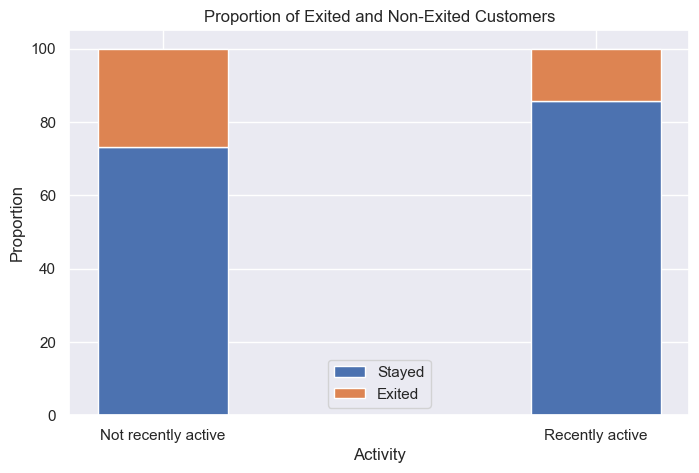

There doesn't seem to be any significant predictor in leaving or staying by the number of years a client has been with the bank.


In [450]:
# Is active member, Exited
df_active_exit = (df
      .groupby("IsActiveMember")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_active_exit.index, df_active_exit[0], label = 'Stayed', tick_label = ["Not recently active", "Recently active"], width = 0.3) 
ax.bar(df_active_exit.index, df_active_exit[1], bottom = df_active_exit[0], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers",
    xlabel = "Activity",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "There doesn't seem to be any significant predictor in leaving or staying by the number of years a client has been with the bank."
print(message)

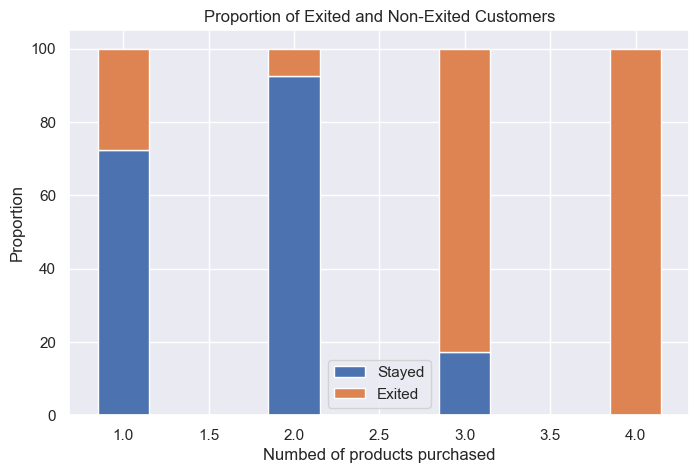

At first sight, there seems to be a link between exiting and purchasing a big number of products.
Particularly, all people who bought 4 products exited. 
However, we have to be careful when comparing because the sizes of people having purchased 3 and 4 products are too small: 
266 and 60 compared to 5084 and 4590 for 1 and 2 prodcts purchased respectively.


In [458]:
# Numbed of products, Exited
df_products_exit = (df
      .groupby("NumOfProducts")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack(fill_value=0))

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_products_exit.index, df_products_exit[0], label = 'Stayed', width = 0.3) 
ax.bar(df_products_exit.index, df_products_exit[1], bottom = df_products_exit[0], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers",
    xlabel = "Numbed of products purchased",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "At first sight, there seems to be a link between exiting and purchasing a big number of products.\nParticularly, all people who bought 4 products exited. \nHowever, we have to be careful when comparing because the sizes of people having purchased 3 and 4 products are too small: \n{} and {} compared to {} and {} for 1 and 2 prodcts purchased respectively.".format(
    len(df.query("NumOfProducts == 3")),
    len(df.query("NumOfProducts == 4")),
    len(df.query("NumOfProducts == 1")),
    len(df.query("NumOfProducts == 2"))
)
print(message)